In [127]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [151]:
import sys
sys.path.append("/content/drive/MyDrive/class/情報デザイン論/Notebook/")

In [129]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import matplotlib.image as mpimg
from IPython.display import HTML
import sys
import matplotlib.animation as animation
from gaze_plot_utils import (
    plot_gaze_trajectory_with_gradient,
    plot_gaze_heatmap,
    plot_gaze_heatmap_with_background,
    animate_gaze_plot_with_background
)

In [130]:
df1_1 = pd.read_csv("/content/drive/MyDrive/class/情報デザイン論/加工データ csv/user-1/user-1-pic1.csv")

In [149]:
df1_1.head()

,Unnamed: 0.1,Unnamed: 0,Recording timestamp,Computer timestamp,Eyetracker timestamp,Gaze point X,Gaze point Y,Gaze point left X,Gaze point left Y,Gaze point right X,...,Gaze point left Y (MCSnorm),Gaze point right X (MCSnorm),Gaze point right Y (MCSnorm),Eye movement type,Eye movement event duration,Eye movement type index,Fixation point X,Fixation point Y,Fixation point X (MCSnorm),Fixation point Y (MCSnorm)
0,4536,4536,91353604,6496397462,6.514732e+09,1616.0,575.0,1646.0,566.0,1586.0,...,0.5237,0.8258,0.5402,Fixation,67.0,204.0,1598.0,600.0,0.8321,0.5560
1,4537,4537,91370512,6496414370,6.514749e+09,1616.0,623.0,1665.0,603.0,1568.0,...,0.5580,0.8165,0.5963,Saccade,17.0,290.0,NaN,NaN,NaN,NaN
2,4538,4538,91386638,6496430496,6.514765e+09,1573.0,647.0,1613.0,642.0,1533.0,...,0.5947,0.7983,0.6035,Unclassified,17.0,80.0,NaN,NaN,NaN,NaN
3,4539,4539,91403573,6496447431,6.514782e+09,1611.0,570.0,1655.0,543.0,1568.0,...,0.5025,0.8164,0.5539,Saccade,17.0,291.0,NaN,NaN,NaN,NaN
4,4540,4540,91420430,6496464288,6.514798e+09,1607.0,592.0,1650.0,576.0,1565.0,...,0.5337,0.8151,0.5632,Fixation,183.0,205.0,1592.0,602.0,0.8291,0.5575


In [132]:
for col in df1_1.columns:
    print(col)

Unnamed: 0.1
Unnamed: 0
Recording timestamp
Computer timestamp
Eyetracker timestamp
Gaze point X
Gaze point Y
Gaze point left X
Gaze point left Y
Gaze point right X
Gaze point right Y
Gaze direction left X
Gaze direction left Y
Gaze direction left Z
Gaze direction right X
Gaze direction right Y
Gaze direction right Z
Pupil diameter left
Pupil diameter right
Pupil diameter filtered
Validity left
Validity right
Eye position left X (DACSmm)
Eye position left Y (DACSmm)
Eye position left Z (DACSmm)
Eye position right X (DACSmm)
Eye position right Y (DACSmm)
Eye position right Z (DACSmm)
Gaze point left X (DACSmm)
Gaze point left Y (DACSmm)
Gaze point right X (DACSmm)
Gaze point right Y (DACSmm)
Gaze point X (MCSnorm)
Gaze point Y (MCSnorm)
Gaze point left X (MCSnorm)
Gaze point left Y (MCSnorm)
Gaze point right X (MCSnorm)
Gaze point right Y (MCSnorm)
Eye movement type
Eye movement event duration
Eye movement type index
Fixation point X
Fixation point Y
Fixation point X (MCSnorm)
Fixation 

In [133]:
min_ts = df1_1['Eyetracker timestamp'].min()
max_ts = df1_1['Eyetracker timestamp'].max()

print(f"Min timestamp: {min_ts} microseconds")
print(f"Max timestamp: {max_ts} microseconds")
print(f"Diff timestamp: {max_ts - min_ts} microseconds")

Min timestamp: 6514731673.0 microseconds
Max timestamp: 6555183375.0 microseconds
Diff timestamp: 40451702.0 microseconds


In [134]:
sampling_intervals = df1_1['Eyetracker timestamp'].diff().dropna()
print(f"Mean interval: {sampling_intervals.mean():.2f} µs")
print(f"Median interval: {sampling_intervals.median():.2f} µs")


Mean interval: 16639.94 µs
Median interval: 16645.00 µs


## 前処理

In [135]:
selected_columns = [
    'Eyetracker timestamp',
    'Gaze point X',
    'Gaze point Y',
    'Gaze point left X',
    'Gaze point left Y',
    'Gaze point right X',
    'Gaze point right Y',
    'Validity left',
    'Validity right'
]

df_selected = df1_1[selected_columns]


## グラフの描画

### 焦点のX, Y座標の時系列における変化

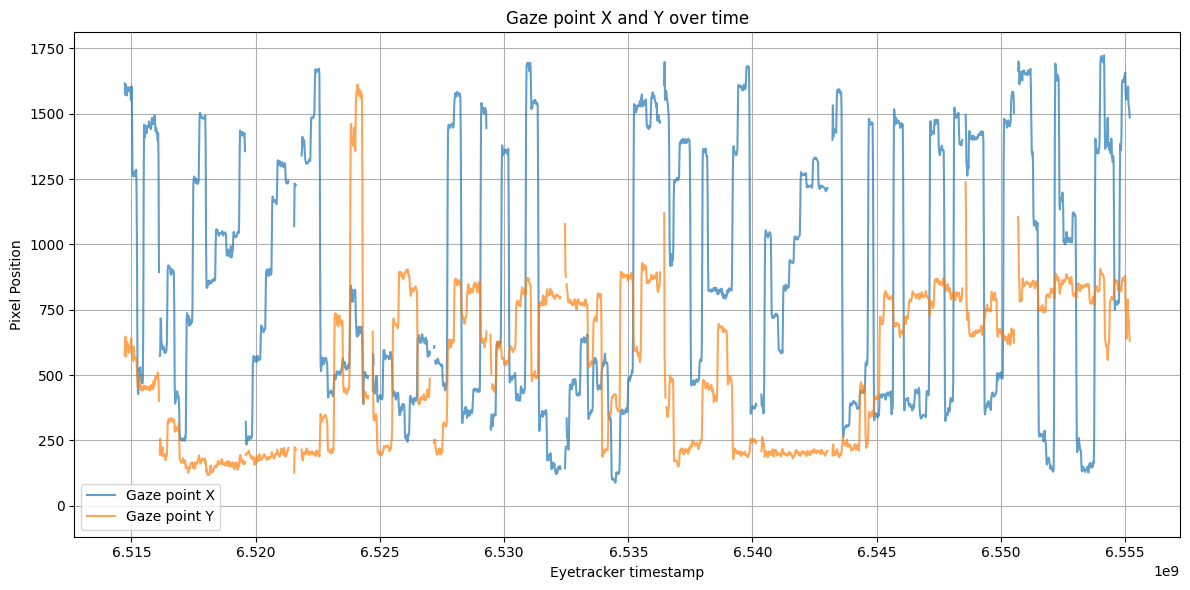

In [136]:
plt.figure(figsize=(12, 6))

# Gaze point X
plt.plot(df_selected['Eyetracker timestamp'], df_selected['Gaze point X'], label='Gaze point X', alpha=0.7)
# Gaze point Y
plt.plot(df_selected['Eyetracker timestamp'], df_selected['Gaze point Y'], label='Gaze point Y', alpha=0.7)

plt.xlabel('Eyetracker timestamp')
plt.ylabel('Pixel Position')
plt.title('Gaze point X and Y over time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### FHDにおけるX座標とY座標の散布図

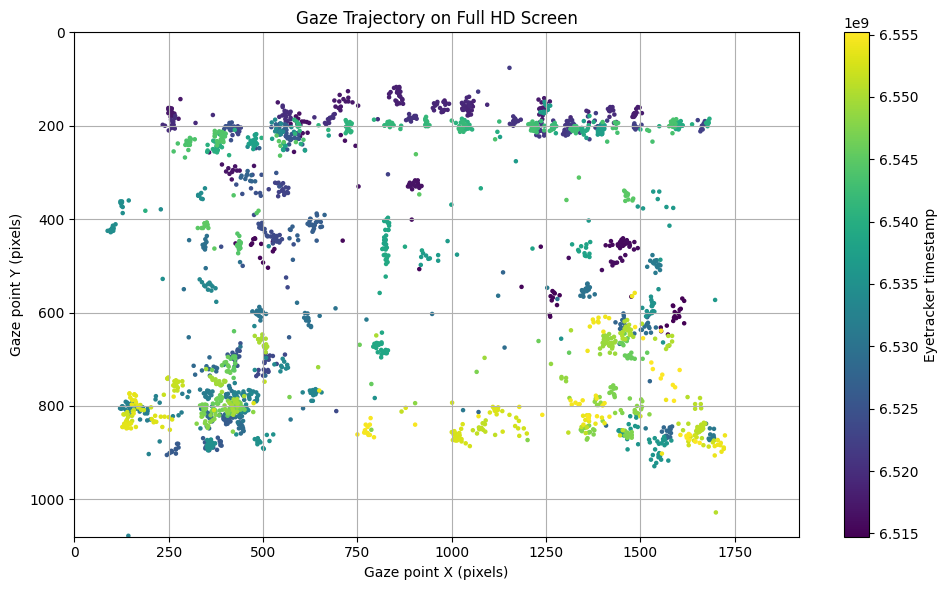

In [137]:
plt.figure(figsize=(10, 6))
plt.scatter(
    df_selected['Gaze point X'],
    df_selected['Gaze point Y'],
    c=df_selected['Eyetracker timestamp'],
    cmap='viridis',
    s=5
)

plt.xlim(0, 1920)
plt.ylim(1080, 0)  # Y軸を逆にしてスクリーンの上が0になるように
plt.xlabel('Gaze point X (pixels)')
plt.ylabel('Gaze point Y (pixels)')
plt.title('Gaze Trajectory on Full HD Screen')
plt.colorbar(label='Eyetracker timestamp')
plt.grid(True)
plt.tight_layout()
plt.show()


### X座標とY座標で視線移動の可視化

/tmp/ipython-input-138-856831046.py:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')  # 赤〜紫系グラデーション


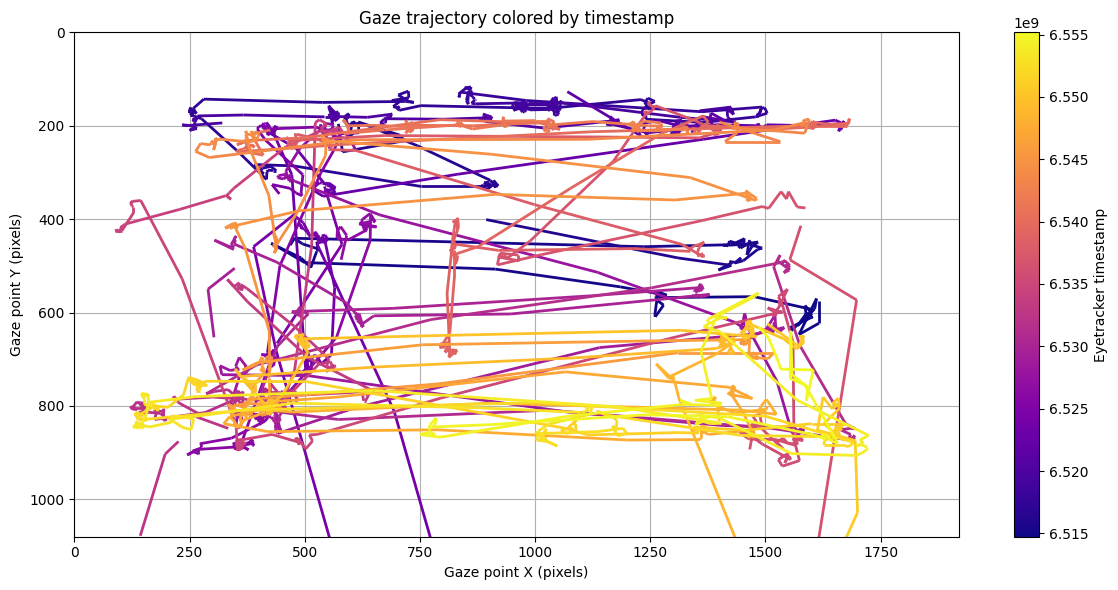

In [138]:
# 座標と時間を取得
x = df_selected['Gaze point X'].values
y = df_selected['Gaze point Y'].values
t = df_selected['Eyetracker timestamp'].values

# 座標を線分として組み立て
points = np.array([x, y]).T.reshape(-1, 1, 2)
segments = np.concatenate([points[:-1], points[1:]], axis=1)

# タイムスタンプの正規化とカラーマップ指定
norm = Normalize(vmin=t.min(), vmax=t.max())
cmap = cm.get_cmap('plasma')  # 赤〜紫系グラデーション
lc = LineCollection(segments, cmap=cmap, norm=norm)
lc.set_array(t[:-1])
lc.set_linewidth(2)

# プロット
plt.figure(figsize=(12, 6))
plt.gca().add_collection(lc)
plt.xlim(0, 1920)
plt.ylim(1080, 0)  # Y軸を反転（画面の上を0に）
plt.xlabel('Gaze point X (pixels)')
plt.ylabel('Gaze point Y (pixels)')
plt.title('Gaze trajectory colored by timestamp')
plt.colorbar(lc, label='Eyetracker timestamp')
plt.grid(True)
plt.tight_layout()
plt.show()

### 0.5秒平均の視線移動

In [139]:
def plot_gaze_trajectory_with_gradient(df, x_col='Gaze point X', y_col='Gaze point Y', time_col='Eyetracker timestamp', screen_width=1920, screen_height=1080, title='Gaze Trajectory with Time Gradient'):
    """
    指定したDataFrameから視線軌跡をグラデーション付きでプロットする。
    df: pandas.DataFrame（視線データ）
    x_col, y_col: X・Y座標のカラム名
    time_col: 時刻（マイクロ秒単位）カラム名
    screen_width, screen_height: 画面サイズ（ピクセル）
    """

    # 必要な列を抽出＆NaN除去
    df_clean = df[[x_col, y_col, time_col]].dropna().copy()

    # 時間（秒単位）に変換して昇順ソート
    df_clean['time_sec'] = (df_clean[time_col] - df_clean[time_col].min()) / 1_000_000
    df_clean = df_clean.sort_values('time_sec')

    # 折れ線の頂点を構築
    x = df_clean[x_col].values
    y = df_clean[y_col].values
    t = df_clean['time_sec'].values

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)

    # グラデーションの定義
    norm = Normalize(vmin=t.min(), vmax=t.max())
    cmap = cm.get_cmap('plasma')
    lc = LineCollection(segments, cmap=cmap, norm=norm)
    lc.set_array(t[:-1])
    lc.set_linewidth(2)

    # プロット
    plt.figure(figsize=(10, 6))
    plt.gca().add_collection(lc)
    plt.xlim(0, screen_width)
    plt.ylim(screen_height, 0)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title(title)
    plt.colorbar(lc, label='Time (s)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-139-1718085866.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')


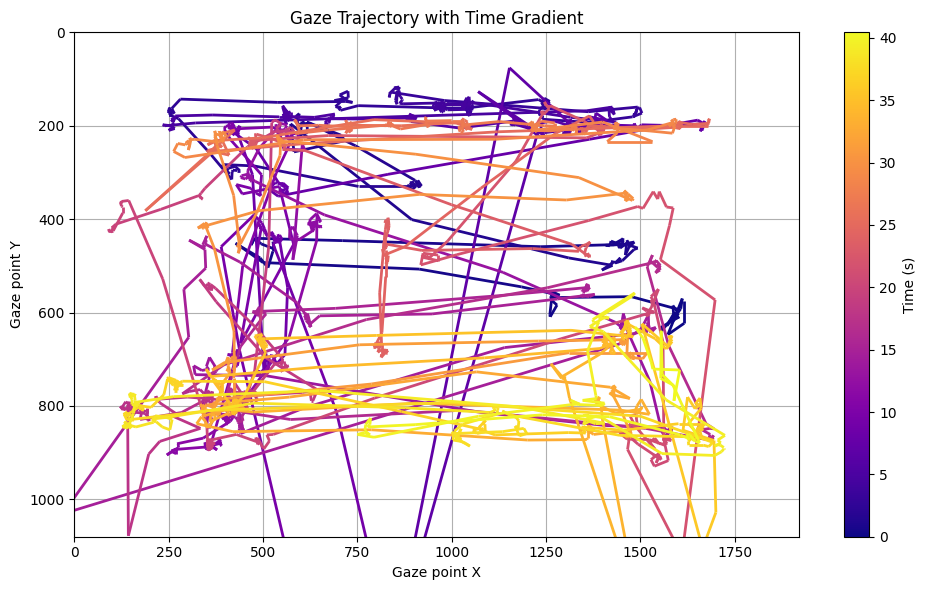

/tmp/ipython-input-139-1718085866.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')


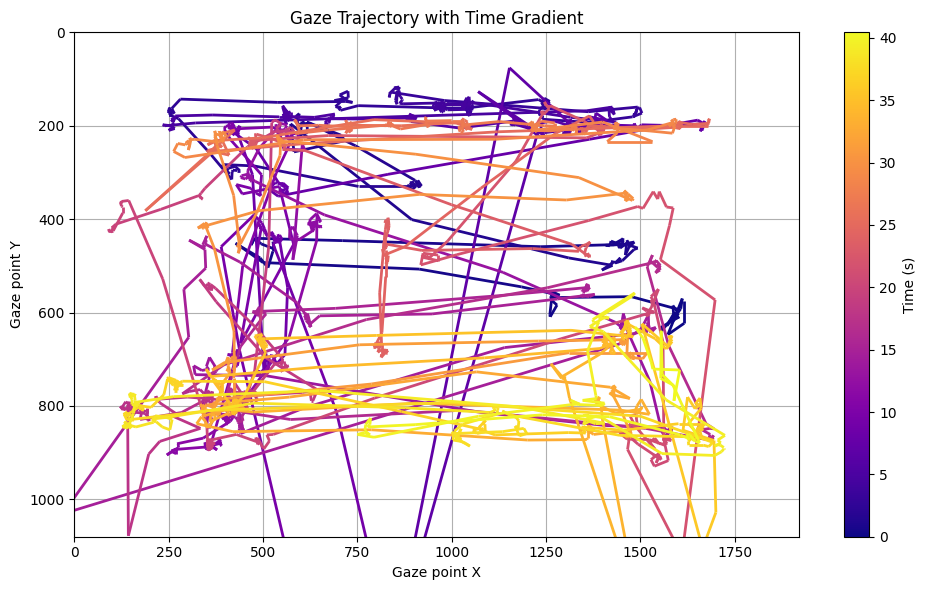

/tmp/ipython-input-139-1718085866.py:27: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('plasma')


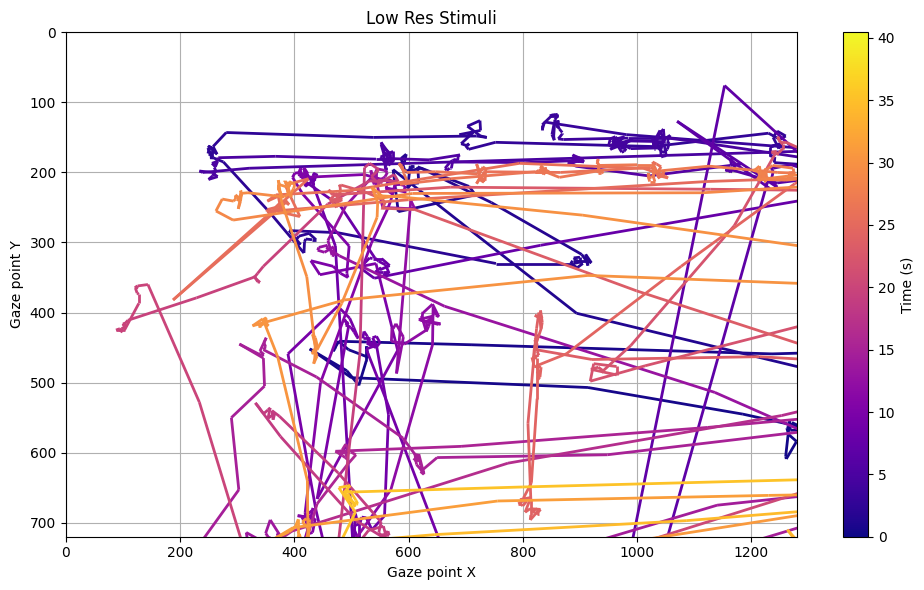

In [140]:
# フィルタ済データフレーム df_in_bounds を渡す場合
plot_gaze_trajectory_with_gradient(df1_1)

# 元の df_selected からも使える
plot_gaze_trajectory_with_gradient(df_selected)

# 画面サイズやタイトルを変えたいとき
plot_gaze_trajectory_with_gradient(df_selected, screen_width=1280, screen_height=720, title='Low Res Stimuli')


In [141]:
def plot_gaze_heatmap(
    df,
    x_col='Gaze point X',
    y_col='Gaze point Y',
    screen_width=1920,
    screen_height=1080,
    bins=(80, 45),
    cmap='hot',
    title='Gaze Heatmap on AOI'
):
    """
    指定したDataFrameから視線ヒートマップを作成・表示する。

    Parameters:
    - df: DataFrame（視線データ）
    - x_col, y_col: Gaze座標のカラム名
    - screen_width, screen_height: AOI画面サイズ（ピクセル）
    - bins: ヒートマップの分割数（tuple: (X方向, Y方向)）
    - cmap: カラーマップ（例: 'hot', 'plasma', 'viridis'）
    - title: プロットタイトル
    """

    # 有効なデータのみ抽出
    df_clean = df[[x_col, y_col]].dropna()

    # ヒストグラム計算（2Dヒートマップ）
    heatmap, xedges, yedges = np.histogram2d(
        df_clean[x_col].values,
        df_clean[y_col].values,
        bins=bins,
        range=[[0, screen_width], [0, screen_height]]
    )

    # Y軸を画面座標（上が0）に合わせて反転
    heatmap = heatmap.T[::-1, :]

    # 描画
    plt.figure(figsize=(12, 6))
    plt.imshow(
        heatmap,
        extent=[0, screen_width, 0, screen_height],
        cmap=cmap,
        interpolation='nearest',
        aspect='auto',
        origin='lower'
    )
    plt.colorbar(label='Gaze Fixation Count')
    plt.title(title)
    plt.xlabel(f'{x_col} (pixels)')
    plt.ylabel(f'{y_col} (pixels)')
    plt.grid(False)
    plt.tight_layout()
    plt.show()

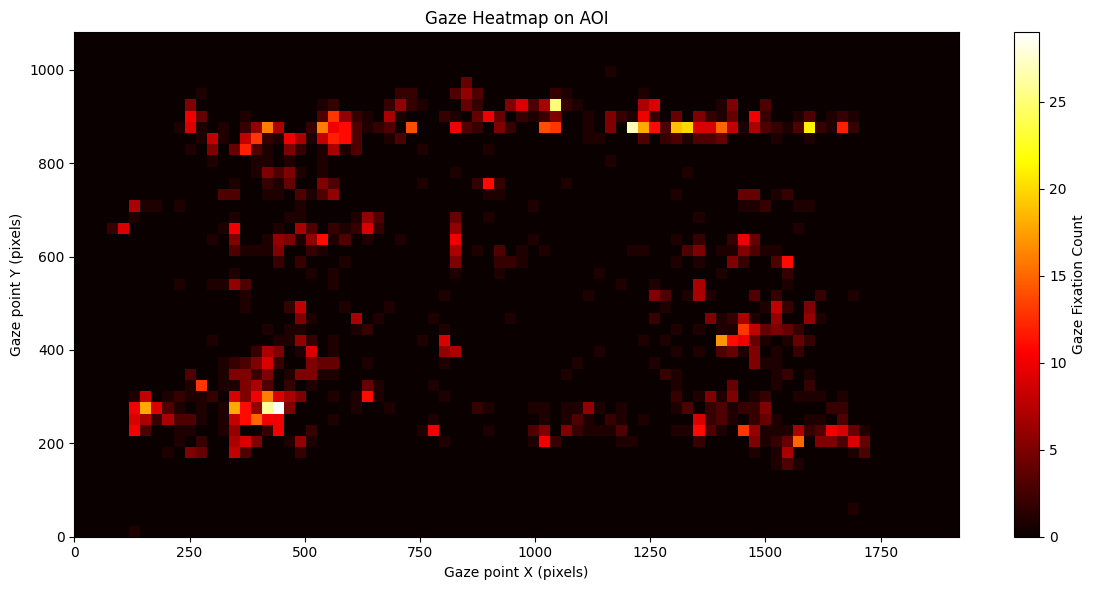

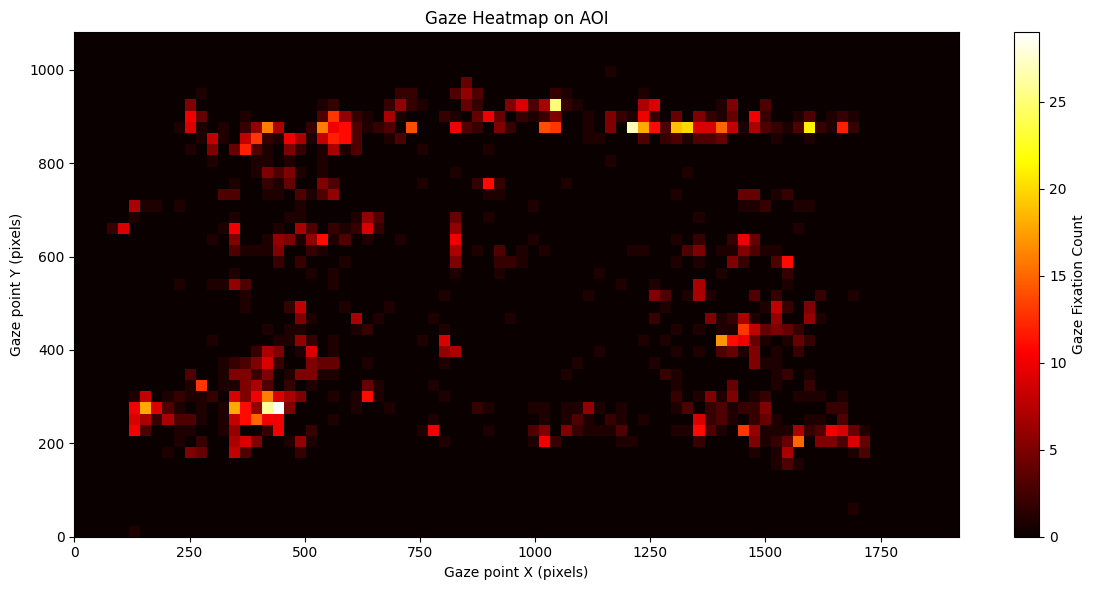

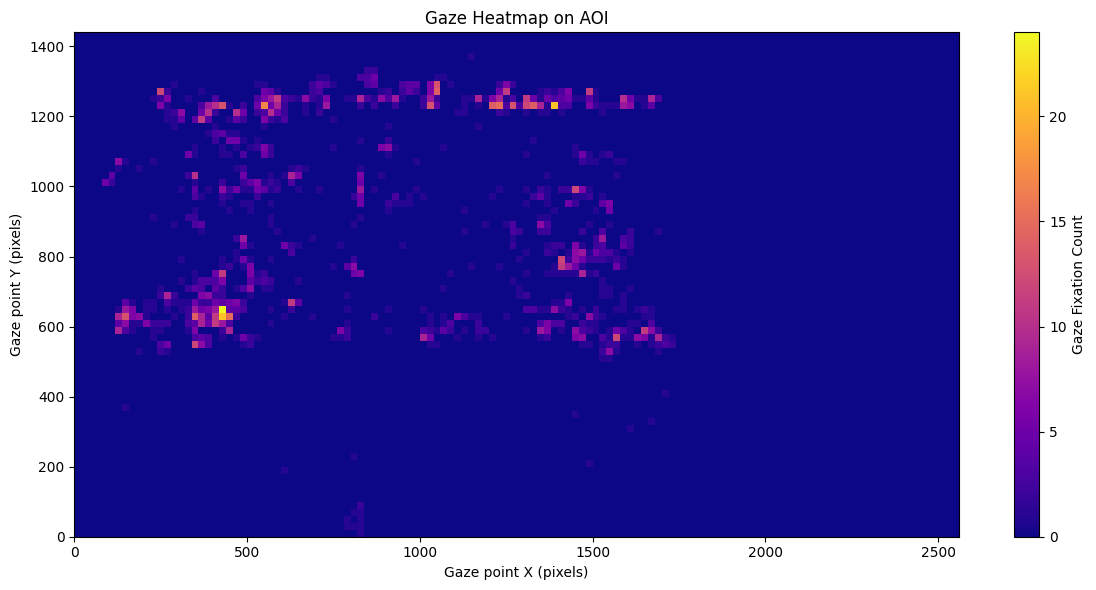

In [142]:
plot_gaze_heatmap(df1_1)
# 通常使用（1920x1080画面、80x45分割）
plot_gaze_heatmap(df_selected)

# 高解像度 or 横長画面などに合わせる場合
plot_gaze_heatmap(df_selected, screen_width=2560, screen_height=1440, bins=(128, 72), cmap='plasma')


In [143]:
def plot_gaze_heatmap_with_background(
    df,
    background_path,
    x_col='Gaze point X',
    y_col='Gaze point Y',
    bins=(80, 45),
    cmap='hot',
    alpha=0.5,
    title='Gaze Heatmap Overlay on AOI Image'
):
    """
    背景画像に視線ヒートマップを重ねて表示する関数

    Parameters:
    - df: pandas.DataFrame（視線データ）
    - background_path: 背景画像のパス（ローカル or マウントパス）
    - x_col, y_col: 視線X/Yカラム名
    - bins: ヒートマップの分割数（(x_bins, y_bins)）
    - cmap: カラーマップ（例: 'hot', 'plasma'）
    - alpha: ヒートマップの透過度（0.0〜1.0）
    - title: プロットタイトル
    """

    """
    plot_gaze_heatmap_with_background(
    df=df_valid,
    background_path="my_image.png",
    bins=(100, 56),           # より高解像度なヒートマップ
    cmap='plasma',            # カラーマップ変更
    alpha=0.6,                # 透過度調整
    title='AOI Heatmap with Background'
)

    """

    # 背景画像の読み込みとサイズ取得
    bg_img = mpimg.imread(background_path)
    img_height, img_width = bg_img.shape[:2]

    # 有効なGazeデータの抽出（NaN除去）
    df_clean = df[[x_col, y_col]].dropna()

    # ヒートマップ（2Dヒストグラム）作成
    heatmap, xedges, yedges = np.histogram2d(
        df_clean[x_col],
        df_clean[y_col],
        bins=bins,
        range=[[0, img_width], [0, img_height]]
    )
    heatmap = heatmap.T[::-1, :]  # Y軸反転で画面座標と一致

    # プロット
    plt.figure(figsize=(12, 6))
    plt.imshow(bg_img, extent=[0, img_width, 0, img_height])  # 背景
    plt.imshow(
        heatmap,
        extent=[0, img_width, 0, img_height],
        cmap=cmap,
        interpolation='nearest',
        alpha=alpha,
        aspect='auto'
    )
    plt.colorbar(label='Gaze Fixation Count')
    plt.title(title)
    plt.xlabel(f'{x_col} (pixels)')
    plt.ylabel(f'{y_col} (pixels)')
    plt.xlim(0, img_width)
    plt.ylim(0, img_height)
    plt.tight_layout()
    plt.show()

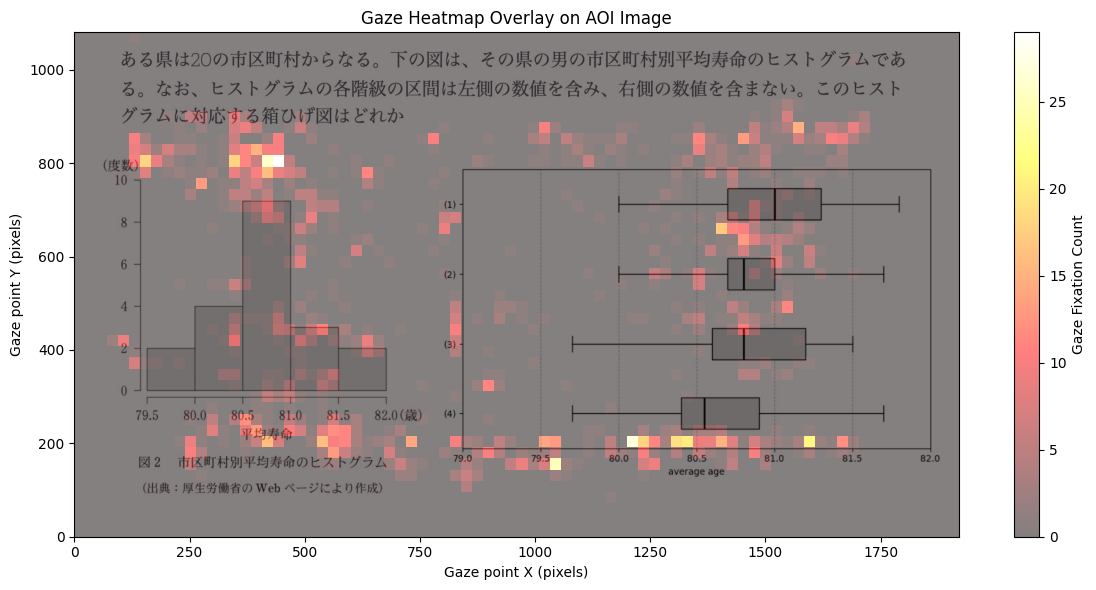

In [144]:
plot_gaze_heatmap_with_background(
    df=df_selected,
    background_path="/content/drive/MyDrive/class/情報デザイン論/question/視線誘導問題.001.jpeg"
)

In [145]:
def animate_gaze_plot(
    df,
    x_col='Gaze point X',
    y_col='Gaze point Y',
    time_col='Eyetracker timestamp',
    screen_width=1920,
    screen_height=1080,
    interval_ms=50,
    trail_length=15,
    title='Animated Gaze Movement'
):
    """
    視線データの時間的な動きをアニメーション表示します。

    Parameters:
    - df: pandas.DataFrame（視線データ）
    - x_col, y_col: 視線座標カラム名
    - time_col: タイムスタンプカラム名（マイクロ秒）
    - screen_width, screen_height: 表示画面サイズ（ピクセル）
    - interval_ms: アニメーションの更新間隔（ミリ秒）
    - trail_length: 点の履歴を何フレーム残すか
    - title: グラフタイトル

    Returns:
    - ani: matplotlib.animation.FuncAnimation オブジェクト（Jupyterで to_jshtml() 可）
    """

    # NaN除去＋経過秒の計算
    df_clean = df[[x_col, y_col, time_col]].dropna().copy()
    df_clean['time_sec'] = (df_clean[time_col] - df_clean[time_col].min()) / 1_000_000
    df_clean = df_clean.sort_values('time_sec').reset_index(drop=True)

    x_data = df_clean[x_col].values
    y_data = df_clean[y_col].values

    # 描画設定
    fig, ax = plt.subplots(figsize=(10, 6))
    scat = ax.scatter([], [], s=50, c='red')
    trail, = ax.plot([], [], 'bo-', alpha=0.5)

    ax.set_xlim(0, screen_width)
    ax.set_ylim(screen_height, 0)
    ax.set_title(title)
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.grid(True)

    # 初期化関数
    def init():
        scat.set_offsets(np.empty((0, 2)))  # 空の2次元配列
        trail.set_data([], [])
        return scat, trail

    # 更新関数
    def update(frame):
        i = min(frame, len(x_data) - 1)

        if i < trail_length:
            trail_x = x_data[:i]
            trail_y = y_data[:i]
        else:
            trail_x = x_data[i - trail_length:i]
            trail_y = y_data[i - trail_length:i]

        current_point = np.array([[x_data[i], y_data[i]]])
        scat.set_offsets(current_point)
        trail.set_data(trail_x, trail_y)

        return scat, trail

    # アニメーション作成
    ani = animation.FuncAnimation(
        fig, update, frames=len(x_data),
        init_func=init, interval=interval_ms, blit=True
    )
    plt.close(fig)  # Jupyterの自動表示抑制
    return ani

In [147]:
ani = animate_gaze_plot_with_background(
    df=df_selected,
    background_path="/content/drive/MyDrive/class/情報デザイン論/question/視線誘導問題.001.jpeg",  # 背景画像パス
    screen_width=1920,
    screen_height=1080,
    interval_ms=50,
    trail_length=15,
    title="Gaze Animation with Background",
    save_path="/content/drive/MyDrive/class/情報デザイン論/加工データ csv/user-1/Gaze-Animation_1.mp4"  # または "gaze.mp4" にすると保存される
)
HTML(ani.to_jshtml())

Output hidden; open in https://colab.research.google.com to view.